**Fremont Bike Trail Analysis**
#Copied from Jake VanderPlas#

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use("seaborn-colorblind")

In [2]:
import os 
from urllib.request import urlretrieve

import pandas as pd

Bike = "https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD"

def get_fremont_data(filename = "Fremont.csv", url = Bike, force_download = False):
    if force_download or not os.path.exists(filename):
        urlretrieve(url,filename)
    data = pd.read_csv("Fremont.csv", index_col="Date", parse_dates = True)
    data.columns = ("West","East")
    data['Total'] = data['West'] + data['East']
    #Square brackets are important to accomplish data reassignment
    return data

In [3]:
from urllib.request import urlretrieve
urlretrieve(Bike, "Fremont.csv")

('Fremont.csv', <http.client.HTTPMessage at 0x1150e7b70>)

In [4]:
data = get_fremont_data()
data.head()

,West,East,Total
Date,,,
2012-10-03 00:00:00,4.0,9.0,13.0
2012-10-03 01:00:00,4.0,6.0,10.0
2012-10-03 02:00:00,1.0,1.0,2.0
2012-10-03 03:00:00,2.0,3.0,5.0
2012-10-03 04:00:00,6.0,1.0,7.0


In [5]:
!head Fremont.csv

Date,Fremont Bridge West Sidewalk,Fremont Bridge East Sidewalk
10/03/2012 12:00:00 AM,4,9
10/03/2012 01:00:00 AM,4,6
10/03/2012 02:00:00 AM,1,1
10/03/2012 03:00:00 AM,2,3
10/03/2012 04:00:00 AM,6,1
10/03/2012 05:00:00 AM,21,10
10/03/2012 06:00:00 AM,105,50
10/03/2012 07:00:00 AM,257,95
10/03/2012 08:00:00 AM,291,146


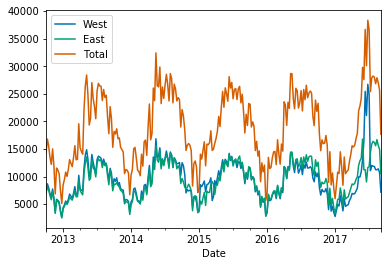

In [6]:
data.resample("W").sum().plot()

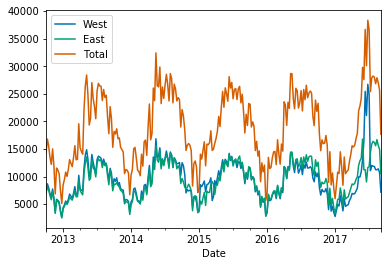

In [7]:
data.resample("W").sum().plot();

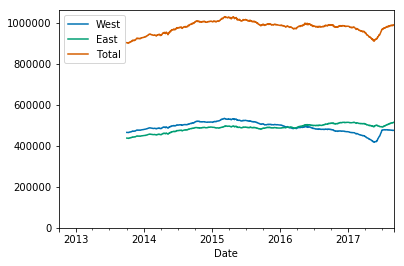

In [8]:
ax = data.resample("D").sum().rolling(365).sum().plot();
ax.set_ylim(0,None);

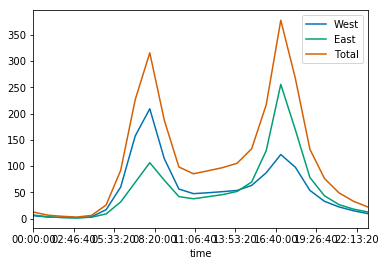

In [9]:
data.groupby(data.index.time).mean().plot();

In [10]:
pivoted = data.pivot_table("Total", index = data.index.time, columns = data.index.date)
pivoted.iloc[:5, :5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


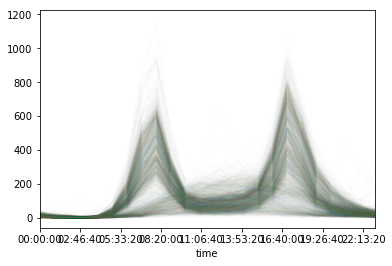

In [11]:
pivoted.plot(legend=False, alpha = 0.01)